<a href="https://colab.research.google.com/github/skhan199/Aerofit-Stats-Probablity/blob/main/Delhivery_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
url = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181'

In [4]:
df = pd.read_csv(url)


In [6]:
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,...,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [7]:
df.shape

(144867, 24)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [9]:
df.data.unique()

array(['training', 'test'], dtype=object)

In [10]:
print("No of rows in  training data : ",df[df["data"]=="training"].data.count())

print("No of rows in  test data : ",df[df["data"]=="test"].data.count())

No of rows in  training data :  104858
No of rows in  test data :  40009


In [11]:
df = df.drop(["is_cutoff","cutoff_factor","cutoff_timestamp","factor","segment_factor"], axis=1)

Removal of all columns that are Unknown field

In [12]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,45.258278,94.0,60.0,67.9280,12.0,12.0,8.1858
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,54.092531,120.0,76.0,85.6829,26.0,21.0,17.3725
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,66.163591,140.0,88.0,97.0933,20.0,34.0,20.7053
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,427.0,73.680667,158.0,98.0,111.2709,17.0,27.0,18.8885


In [13]:
time_val = df.groupby(["trip_uuid","source_name","destination_name"]).actual_time.last()
time_val = pd.DataFrame(time_val)
time_val = time_val.reset_index()

actual_time_val = time_val.groupby("trip_uuid").actual_time.sum()
actual_time_val = pd.DataFrame(actual_time_val)
actual_time_val = actual_time_val.reset_index()
actual_time_val

,trip_uuid,actual_time
0,trip-153671041653548748,1562.0
1,trip-153671042288605164,143.0
2,trip-153671043369099517,3347.0
3,trip-153671046011330457,59.0
4,trip-153671052974046625,341.0
...,...,...
14782,trip-153861095625827784,83.0
14783,trip-153861104386292051,21.0
14784,trip-153861106442901555,282.0
14785,trip-153861115439069069,264.0


In [14]:
osrmtime_val = df.groupby(["trip_uuid","source_name","destination_name"]).osrm_time.last()
osrmtime_val = pd.DataFrame(osrmtime_val)
osrmtime_val = osrmtime_val.reset_index()

osrm_time_val = osrmtime_val.groupby("trip_uuid").osrm_time.sum()
osrm_time_val = pd.DataFrame(osrm_time_val)
osrm_time_val = osrm_time_val.reset_index()
osrm_time_val

,trip_uuid,osrm_time
0,trip-153671041653548748,717.0
1,trip-153671042288605164,68.0
2,trip-153671043369099517,1740.0
3,trip-153671046011330457,15.0
4,trip-153671052974046625,117.0
...,...,...
14782,trip-153861095625827784,62.0
14783,trip-153861104386292051,12.0
14784,trip-153861106442901555,48.0
14785,trip-153861115439069069,179.0


In [15]:
seg_actual_time_val = df.groupby(["trip_uuid","source_name","destination_name"]).segment_actual_time.sum()
seg_actual_time_val = pd.DataFrame(seg_actual_time_val)
seg_actual_time_val = seg_actual_time_val.reset_index()

segment_actual_time_val = seg_actual_time_val.groupby("trip_uuid").segment_actual_time.sum()
segment_actual_time_val = pd.DataFrame(segment_actual_time_val)
segment_actual_time_val = segment_actual_time_val.reset_index()
segment_actual_time_val

,trip_uuid,segment_actual_time
0,trip-153671041653548748,1548.0
1,trip-153671042288605164,141.0
2,trip-153671043369099517,3308.0
3,trip-153671046011330457,59.0
4,trip-153671052974046625,340.0
...,...,...
14782,trip-153861095625827784,82.0
14783,trip-153861104386292051,21.0
14784,trip-153861106442901555,281.0
14785,trip-153861115439069069,258.0


In [16]:
osrm_dst_val = df.groupby(["trip_uuid","source_name","destination_name"]).osrm_distance.last()
osrm_dst_val = pd.DataFrame(osrm_dst_val)
osrm_dst_val = osrm_dst_val.reset_index()

osrm_distance_val = osrm_dst_val.groupby("trip_uuid").osrm_distance.sum()
osrm_distance_val = pd.DataFrame(osrm_distance_val)
osrm_distance_val = osrm_distance_val.reset_index()
osrm_distance_val

,trip_uuid,osrm_distance
0,trip-153671041653548748,991.3523
1,trip-153671042288605164,85.1110
2,trip-153671043369099517,2354.0665
3,trip-153671046011330457,19.6800
4,trip-153671052974046625,146.7918
...,...,...
14782,trip-153861095625827784,73.4630
14783,trip-153861104386292051,16.0882
14784,trip-153861106442901555,58.9037
14785,trip-153861115439069069,171.1103


In [17]:
seg_osrm_dst_val = df.groupby(["trip_uuid","source_name","destination_name"]).segment_osrm_distance.sum()
seg_osrm_dst_val = pd.DataFrame(seg_osrm_dst_val)
seg_osrm_dst_val = seg_osrm_dst_val.reset_index()

segment_osrm_distance_val = seg_osrm_dst_val.groupby("trip_uuid").segment_osrm_distance.sum()
segment_osrm_distance_val = pd.DataFrame(segment_osrm_distance_val)
segment_osrm_distance_val = segment_osrm_distance_val.reset_index()
segment_osrm_distance_val

,trip_uuid,segment_osrm_distance
0,trip-153671041653548748,1320.4733
1,trip-153671042288605164,84.1894
2,trip-153671043369099517,2545.2678
3,trip-153671046011330457,19.8766
4,trip-153671052974046625,146.7919
...,...,...
14782,trip-153861095625827784,64.8551
14783,trip-153861104386292051,16.0883
14784,trip-153861106442901555,104.8866
14785,trip-153861115439069069,223.5324


In [18]:
seg_osrm_time_val = df.groupby(["trip_uuid","source_name","destination_name"]).segment_osrm_time.sum()
seg_osrm_time_val = pd.DataFrame(seg_osrm_time_val)
seg_osrm_time_val = seg_osrm_time_val.reset_index()

segment_osrm_time_val = seg_osrm_time_val.groupby("trip_uuid").segment_osrm_time.sum()
segment_osrm_time_val = pd.DataFrame(segment_osrm_time_val)
segment_osrm_time_val = segment_osrm_time_val.reset_index()
segment_osrm_time_val

,trip_uuid,segment_osrm_time
0,trip-153671041653548748,1008.0
1,trip-153671042288605164,65.0
2,trip-153671043369099517,1941.0
3,trip-153671046011330457,16.0
4,trip-153671052974046625,115.0
...,...,...
14782,trip-153861095625827784,62.0
14783,trip-153861104386292051,11.0
14784,trip-153861106442901555,88.0
14785,trip-153861115439069069,221.0


Each Trip_uuid has more than one stops or relay points in its journey to reach from source to destination , hence group-by and Aggregate functions should be used careful i,e while grouping ["trip_uuid","source_name","destination_name"] use “last()” as we have multiple sources and destinations for each trip and while grouping ("trip_uuid") use sum() , also while using the grouping of segmented values we can directly use sum() as each value is individual recording .



In [19]:
condensed_df = df.copy()

In [20]:
condensed_df = pd.merge(condensed_df,actual_time_val, on = "trip_uuid", how="right")
condensed_df = pd.merge(condensed_df,osrm_time_val, on = "trip_uuid", how="right")
condensed_df = pd.merge(condensed_df,segment_actual_time_val, on = "trip_uuid", how="right")
condensed_df = pd.merge(condensed_df,osrm_distance_val, on = "trip_uuid", how="right")
condensed_df = pd.merge(condensed_df,segment_osrm_distance_val, on = "trip_uuid", how="right")
condensed_df = pd.merge(condensed_df,segment_osrm_time_val, on = "trip_uuid", how="right")

condensed_df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,osrm_distance_x,segment_actual_time_x,segment_osrm_time_x,segment_osrm_distance_x,actual_time_y,osrm_time_y,segment_actual_time_y,osrm_distance_y,segment_osrm_distance_y,segment_osrm_time_y
0,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,55.2597,43.0,39.0,55.2597,1562.0,717.0,1548.0,991.3523,1320.4733,1008.0
1,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,49.4845,25.0,52.0,73.8647,1562.0,717.0,1548.0,991.3523,1320.4733,1008.0
2,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,72.5479,76.0,16.0,23.0634,1562.0,717.0,1548.0,991.3523,1320.4733,1008.0
3,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,93.9641,35.0,15.0,21.4162,1562.0,717.0,1548.0,991.3523,1320.4733,1008.0
4,training,2018-09-12 00:00:16.535741,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,...,117.2332,23.0,16.0,23.2691,1562.0,717.0,1548.0,991.3523,1320.4733,1008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144661,test,2018-10-03 23:59:14.390954,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,trip-153861115439069069,IND628613AAA,Peikulam_SriVnktpm_D (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,...,40.6080,51.0,47.0,38.3058,264.0,179.0,258.0,171.1103,223.5324,221.0
144662,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,23.2367,30.0,21.0,23.2367,275.0,68.0,274.0,80.5787,80.5787,67.0
144663,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,...,28.0484,11.0,4.0,4.8117,275.0,68.0,274.0,80.5787,80.5787,67.0
144664,test,2018-10-03 23:59:42.701692,thanos::sroute:412fea14-6d1f-4222-8a5f-a517042...,FTL,trip-153861118270144424,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,...,23.9866,45.0,17.0,23.9866,275.0,68.0,274.0,80.5787,80.5787,67.0


In [21]:
condensed_df = condensed_df.drop(["route_schedule_uuid","destination_center","source_center"], axis=1)

In [22]:
condensed_df.isna().sum()/len(df)*100

,0
data,0.000000
trip_creation_time,0.000000
route_type,0.000000
trip_uuid,0.000000
source_name,0.133916
destination_name,0.107685
od_start_time,0.000000
od_end_time,0.000000
start_scan_to_end_scan,0.000000
actual_distance_to_destination,0.000000


Columns Source-name and Destination-name have missing values with less than 0.2% , dropping off these rows as such minor percent of values may not affect the data.

In [23]:
## Dropping missing value rows from source_name and destination_name as the missing values are less than 0.5%

condensed_df.dropna(axis =0, how="any", inplace = True)

In [24]:
condensed_df.isna().sum()/len(df)*100

,0
data,0.0
trip_creation_time,0.0
route_type,0.0
trip_uuid,0.0
source_name,0.0
destination_name,0.0
od_start_time,0.0
od_end_time,0.0
start_scan_to_end_scan,0.0
actual_distance_to_destination,0.0


In [25]:
condensed_df[["source_city","source_place","source_code&state"]] = condensed_df.source_name.str.split("_", n=2, expand = True)
condensed_df[["source_code","source_state"]] = condensed_df["source_code&state"].str.split(" ", n=1, expand = True)


condensed_df[["destination_city","destination_place",
              "destination_code&state"]] = condensed_df.destination_name.str.split("_", n=2, expand = True)
condensed_df[["destination_code","destination_state"]] = condensed_df["destination_code&state"].str.split(" ",
                                                                                                          n=1, expand = True)

condensed_df.drop(["source_code&state","destination_code&state"],axis = 1, inplace = True)
condensed_df

,data,trip_creation_time,route_type,trip_uuid,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,...,segment_osrm_distance_y,segment_osrm_time_y,source_city,source_place,source_code,source_state,destination_city,destination_place,destination_code,destination_state
0,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,22.812439,...,1320.4733,1008.0,Bhopal,Trnsport,H,(Madhya Pradesh),Kanpur,Central,H_6,(Uttar Pradesh)
1,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,45.902553,...,1320.4733,1008.0,Bhopal,Trnsport,H,(Madhya Pradesh),Kanpur,Central,H_6,(Uttar Pradesh)
2,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,68.090371,...,1320.4733,1008.0,Bhopal,Trnsport,H,(Madhya Pradesh),Kanpur,Central,H_6,(Uttar Pradesh)
3,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,88.382207,...,1320.4733,1008.0,Bhopal,Trnsport,H,(Madhya Pradesh),Kanpur,Central,H_6,(Uttar Pradesh)
4,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,110.168313,...,1320.4733,1008.0,Bhopal,Trnsport,H,(Madhya Pradesh),Kanpur,Central,H_6,(Uttar Pradesh)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144661,test,2018-10-03 23:59:14.390954,Carting,trip-153861115439069069,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-04 04:16:39.894872,2018-10-04 05:47:45.162682,91.0,33.673835,...,223.5324,221.0,Peikulam,SriVnktpm,D,(Tamil Nadu),Tirunelveli,VdkkuSrt,I,(Tamil Nadu)
144662,test,2018-10-03 23:59:42.701692,FTL,trip-153861118270144424,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,2018-10-04 03:58:40.726547,66.0,22.156817,...,80.5787,67.0,Hospet (Karnataka),None,None,None,Sandur,WrdN1DPP,D,(Karnataka)
144663,test,2018-10-03 23:59:42.701692,FTL,trip-153861118270144424,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),2018-10-04 02:51:44.712656,2018-10-04 03:58:40.726547,66.0,25.534793,...,80.5787,67.0,Hospet (Karnataka),None,None,None,Sandur,WrdN1DPP,D,(Karnataka)
144664,test,2018-10-03 23:59:42.701692,FTL,trip-153861118270144424,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-10-04 03:58:40.726547,2018-10-04 08:46:09.166940,287.0,22.000767,...,80.5787,67.0,Sandur,WrdN1DPP,D,(Karnataka),Bellary,Dc (Karnataka),None,None


In [26]:
condensed_df.isna().sum()/len(df)*100

,0
data,0.000000
trip_creation_time,0.000000
route_type,0.000000
trip_uuid,0.000000
source_name,0.000000
destination_name,0.000000
od_start_time,0.000000
od_end_time,0.000000
start_scan_to_end_scan,0.000000
actual_distance_to_destination,0.000000


After dividing Source-name and Destination-name into city, place , code , state , it is seen that the address format is not the same for all orders and missing values can be found in place -1.5% , code-10% , state-10% , filling the null values with value of column city of the same respective rows

In [27]:
condensed_df["trip_creation_time"]= condensed_df.trip_creation_time.apply(pd.to_datetime)

condensed_df["Trip_Year"]=condensed_df.trip_creation_time.dt.year
condensed_df["Trip_Month"]=condensed_df.trip_creation_time.dt.month
condensed_df["Trip_Day"]=condensed_df.trip_creation_time.dt.day

In [29]:
print("Year :", condensed_df.Trip_Year.value_counts())
print("")
print("Month :", condensed_df.Trip_Month.value_counts())
print("")

print("Day :", condensed_df.Trip_Day.value_counts())

Year : Trip_Year
2018    144316
Name: count, dtype: int64

Month : Trip_Month
9     126932
10     17384
Name: count, dtype: int64

Day : Trip_Day
21    7626
15    7366
18    7354
20    7272
25    7120
13    7110
26    7011
17    7006
12    6995
22    6865
14    6809
16    6688
24    6596
19    6566
23    6248
3     6062
27    6040
1     5938
28    5742
29    5643
2     5384
30    4875
Name: count, dtype: int64


Column trip_creation_time can be divided into Trip_Year, Trip_Month, Trip_Day , from these we can infer that data is from year 2018, month september(9) but data from days 4 to 11 are not present in data .

In [ ]:
import datetime as DT

condensed_df[["od_start_time","od_end_time"]]= condensed_df[["od_start_time","od_end_time"]].apply(pd.to_datetime)
condensed_df["Total_timetaken"] = ((condensed_df.od_end_time)-(condensed_df.od_start_time))
condensed_df["Total_timetaken"] = condensed_df["Total_timetaken"].apply(lambda x: x.total_seconds()/60)

condensed_df.drop(['od_end_time','od_start_time'], axis=1, inplace=True)

Column start_scan_to_end_scan contains time taken to deliver from source to destination in Mins

Using columns 'od_end_time','od_start_time' a new feature can be created Total time taken by checking the difference between 'od_end_time','od_start_time' .

In [32]:
start_to_end= condensed_df.groupby("trip_uuid").start_scan_to_end_scan.sum()
start_to_end = pd.DataFrame(start_to_end)
start_to_end = start_to_end.reset_index()

condensed_df = pd.merge(condensed_df,start_to_end, on = "trip_uuid", how="right")

agg_Total_timetaken = condensed_df.groupby("trip_uuid").Total_timetaken.sum()
agg_Total_timetaken = pd.DataFrame(agg_Total_timetaken)
agg_Total_timetaken = agg_Total_timetaken.reset_index()

condensed_df = pd.merge(condensed_df,agg_Total_timetaken, on = "trip_uuid", how="right")

In [33]:
condensed_df.Total_timetaken_y = condensed_df.Total_timetaken_y.round(1)
condensed_df

,data,trip_creation_time,route_type,trip_uuid,source_name,destination_name,start_scan_to_end_scan_x,actual_distance_to_destination,actual_time_x,osrm_time_x,...,destination_city,destination_place,destination_code,destination_state,Trip_Year,Trip_Month,Trip_Day,Total_timetaken_x,start_scan_to_end_scan_y,Total_timetaken_y
0,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),999.0,22.812439,43.0,39.0,...,Kanpur,Central,H_6,(Uttar Pradesh),2018,9,12,999.505379,43659.0,43680.5
1,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),999.0,45.902553,69.0,35.0,...,Kanpur,Central,H_6,(Uttar Pradesh),2018,9,12,999.505379,43659.0,43680.5
2,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),999.0,68.090371,146.0,51.0,...,Kanpur,Central,H_6,(Uttar Pradesh),2018,9,12,999.505379,43659.0,43680.5
3,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),999.0,88.382207,181.0,66.0,...,Kanpur,Central,H_6,(Uttar Pradesh),2018,9,12,999.505379,43659.0,43680.5
4,training,2018-09-12 00:00:16.535741,FTL,trip-153671041653548748,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),999.0,110.168313,205.0,82.0,...,Kanpur,Central,H_6,(Uttar Pradesh),2018,9,12,999.505379,43659.0,43680.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144311,test,2018-10-03 23:59:14.390954,Carting,trip-153861115439069069,Peikulam_SriVnktpm_D (Tamil Nadu),Tirunelveli_VdkkuSrt_I (Tamil Nadu),91.0,33.673835,90.0,48.0,...,Tirunelveli,VdkkuSrt,I,(Tamil Nadu),2018,10,3,91.087797,1315.0,1320.4
144312,test,2018-10-03 23:59:42.701692,FTL,trip-153861118270144424,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),66.0,22.156817,30.0,21.0,...,Sandur,WrdN1DPP,D,(Karnataka),2018,10,3,66.933565,706.0,708.8
144313,test,2018-10-03 23:59:42.701692,FTL,trip-153861118270144424,Hospet (Karnataka),Sandur_WrdN1DPP_D (Karnataka),66.0,25.534793,42.0,26.0,...,Sandur,WrdN1DPP,D,(Karnataka),2018,10,3,66.933565,706.0,708.8
144314,test,2018-10-03 23:59:42.701692,FTL,trip-153861118270144424,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),287.0,22.000767,45.0,17.0,...,Bellary,Dc (Karnataka),None,None,2018,10,3,287.474007,706.0,708.8


<Axes: ylabel='count'>

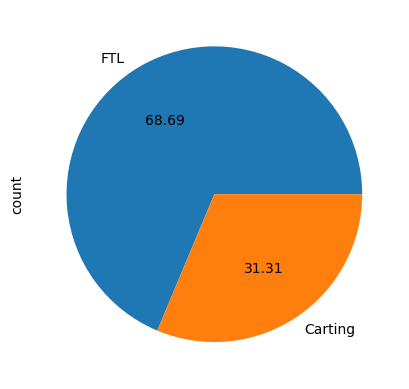

In [34]:
condensed_df['route_type'].value_counts().plot(kind='pie',autopct="%.2f")

<Axes: ylabel='count'>

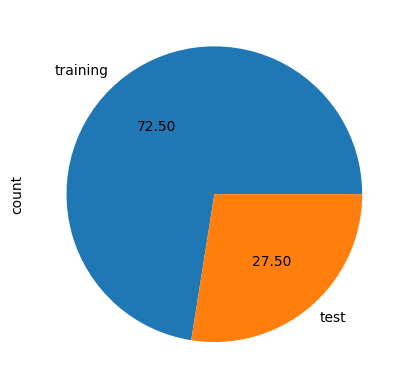

In [35]:
condensed_df['data'].value_counts().plot(kind='pie',autopct="%.2f")

**Before grouping the data by trip_uuid Route type FTL comprises 67.95% and Carting comprises 32.05% of the total orders .**


In [36]:
x_df = condensed_df.groupby("trip_uuid")[["data","route_type","source_code","destination_code","actual_time_y","osrm_time_y",
                                          "osrm_distance_y","source_state","destination_state","Trip_Day"]].last()
x_df = pd.DataFrame(x_df)
x_df = x_df.reset_index()

x_df

,trip_uuid,data,route_type,source_code,destination_code,actual_time_y,osrm_time_y,osrm_distance_y,source_state,destination_state,Trip_Day
0,trip-153671041653548748,training,FTL,H_6,HB,1562.0,717.0,991.3523,(Uttar Pradesh),(Haryana),12
1,trip-153671042288605164,training,Carting,D,D,143.0,68.0,85.1110,(Karnataka),(Karnataka),12
2,trip-153671043369099517,training,FTL,HB,H,3347.0,1740.0,2354.0665,(Haryana),(Punjab),12
3,trip-153671046011330457,training,Carting,None,IP,59.0,15.0,19.6800,None,(Maharashtra),12
4,trip-153671052974046625,training,FTL,D,D,341.0,117.0,146.7918,(Karnataka),(Karnataka),12
...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,test,Carting,C,H,83.0,62.0,73.4630,(Chandigarh),(Punjab),3
14783,trip-153861104386292051,test,Carting,DPC,DC,21.0,12.0,16.0882,(Haryana),(Haryana),3
14784,trip-153861106442901555,test,Carting,DC,H_6,282.0,48.0,58.9037,(Uttar Pradesh),(Uttar Pradesh),3
14785,trip-153861115439069069,test,Carting,D,I,264.0,179.0,171.1103,(Tamil Nadu),(Tamil Nadu),3


In [37]:
# Top 10 Cities with Highest number of trips
pd.set_option("display.max_rows", 1000)
y_df = condensed_df.groupby(["source_city","destination_city"])["actual_time_y"].count()
y_df = pd.DataFrame(y_df)
y_df = y_df.reset_index()

y_df.sort_values(by=['actual_time_y'], ascending=False , inplace = True)
y_df.head(10)

,source_city,destination_city,actual_time_y
810,Gurgaon,Bangalore,4976
198,Bangalore,Gurgaon,3316
833,Gurgaon,Kolkata,2862
270,Bengaluru,Bengaluru,2062
190,Bangalore,Bengaluru,1741
828,Gurgaon,Hyderabad,1639
811,Gurgaon,Bhiwandi,1617
817,Gurgaon,Delhi,1345
334,Bhiwandi,Gurgaon,1269
268,Bengaluru,Bangalore,1268


Top cities that have more number of Trips are Bangalore, Gurgaon, Kolkata, Hyderabad, Bhiwandi, Delhi.

<Axes: ylabel='count'>

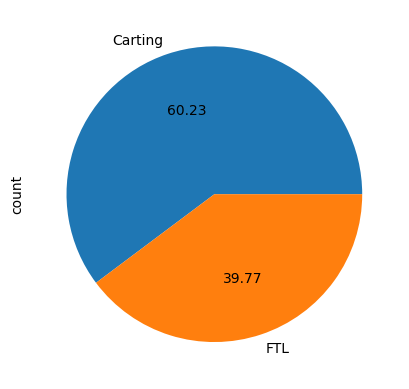

In [38]:
x_df['route_type'].value_counts().plot(kind='pie',autopct="%.2f")

<Axes: ylabel='count'>

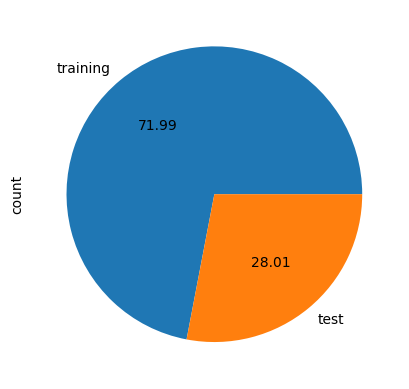

In [39]:
x_df['data'].value_counts().plot(kind='pie',autopct="%.2f")

From the above difference between before and after grouping by trip_uuid we can infer that FTL type has more relay point although it is not making no other pickups or drop-offs along the way Among the given data Training data comprises 72.49% and test data comprises 27.51%

<Axes: xlabel='source_code', ylabel='Count'>

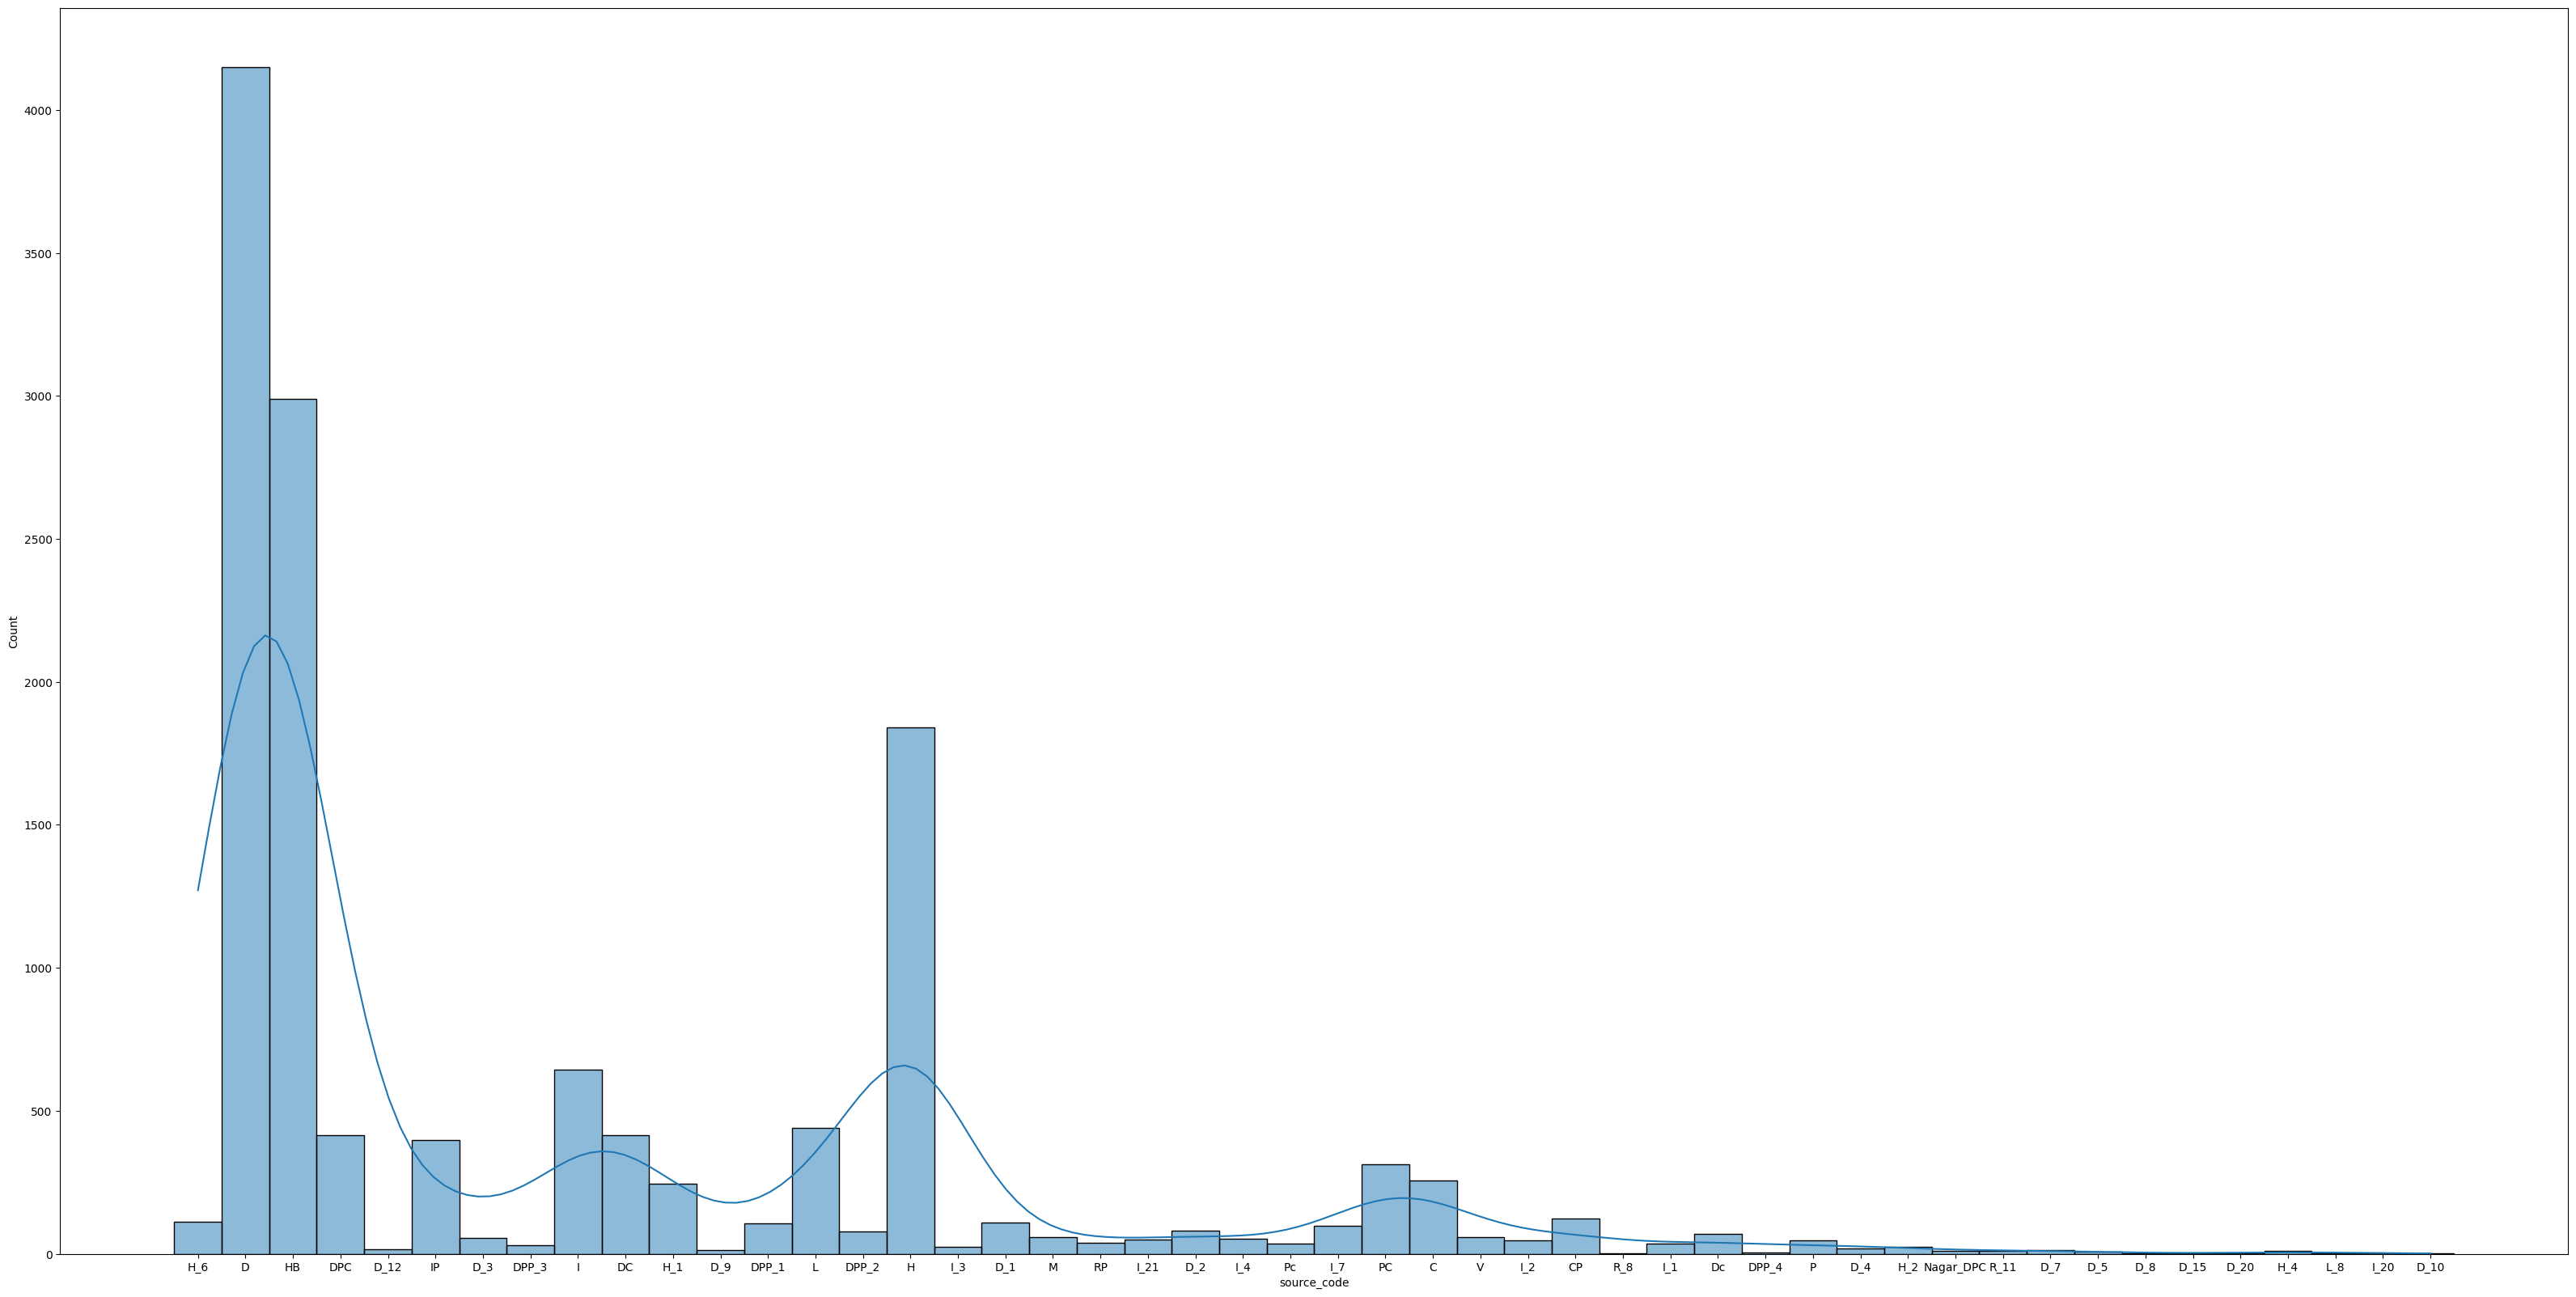

In [40]:
### Quantative attributes in data are
### source_code,source_state,destination_code,destination_state,Trip_Day

fig1, ax1 = plt.subplots(figsize=(40, 20))


sns.histplot(data =x_df , x ='source_code', kde = True )

<Axes: xlabel='destination_code', ylabel='Count'>

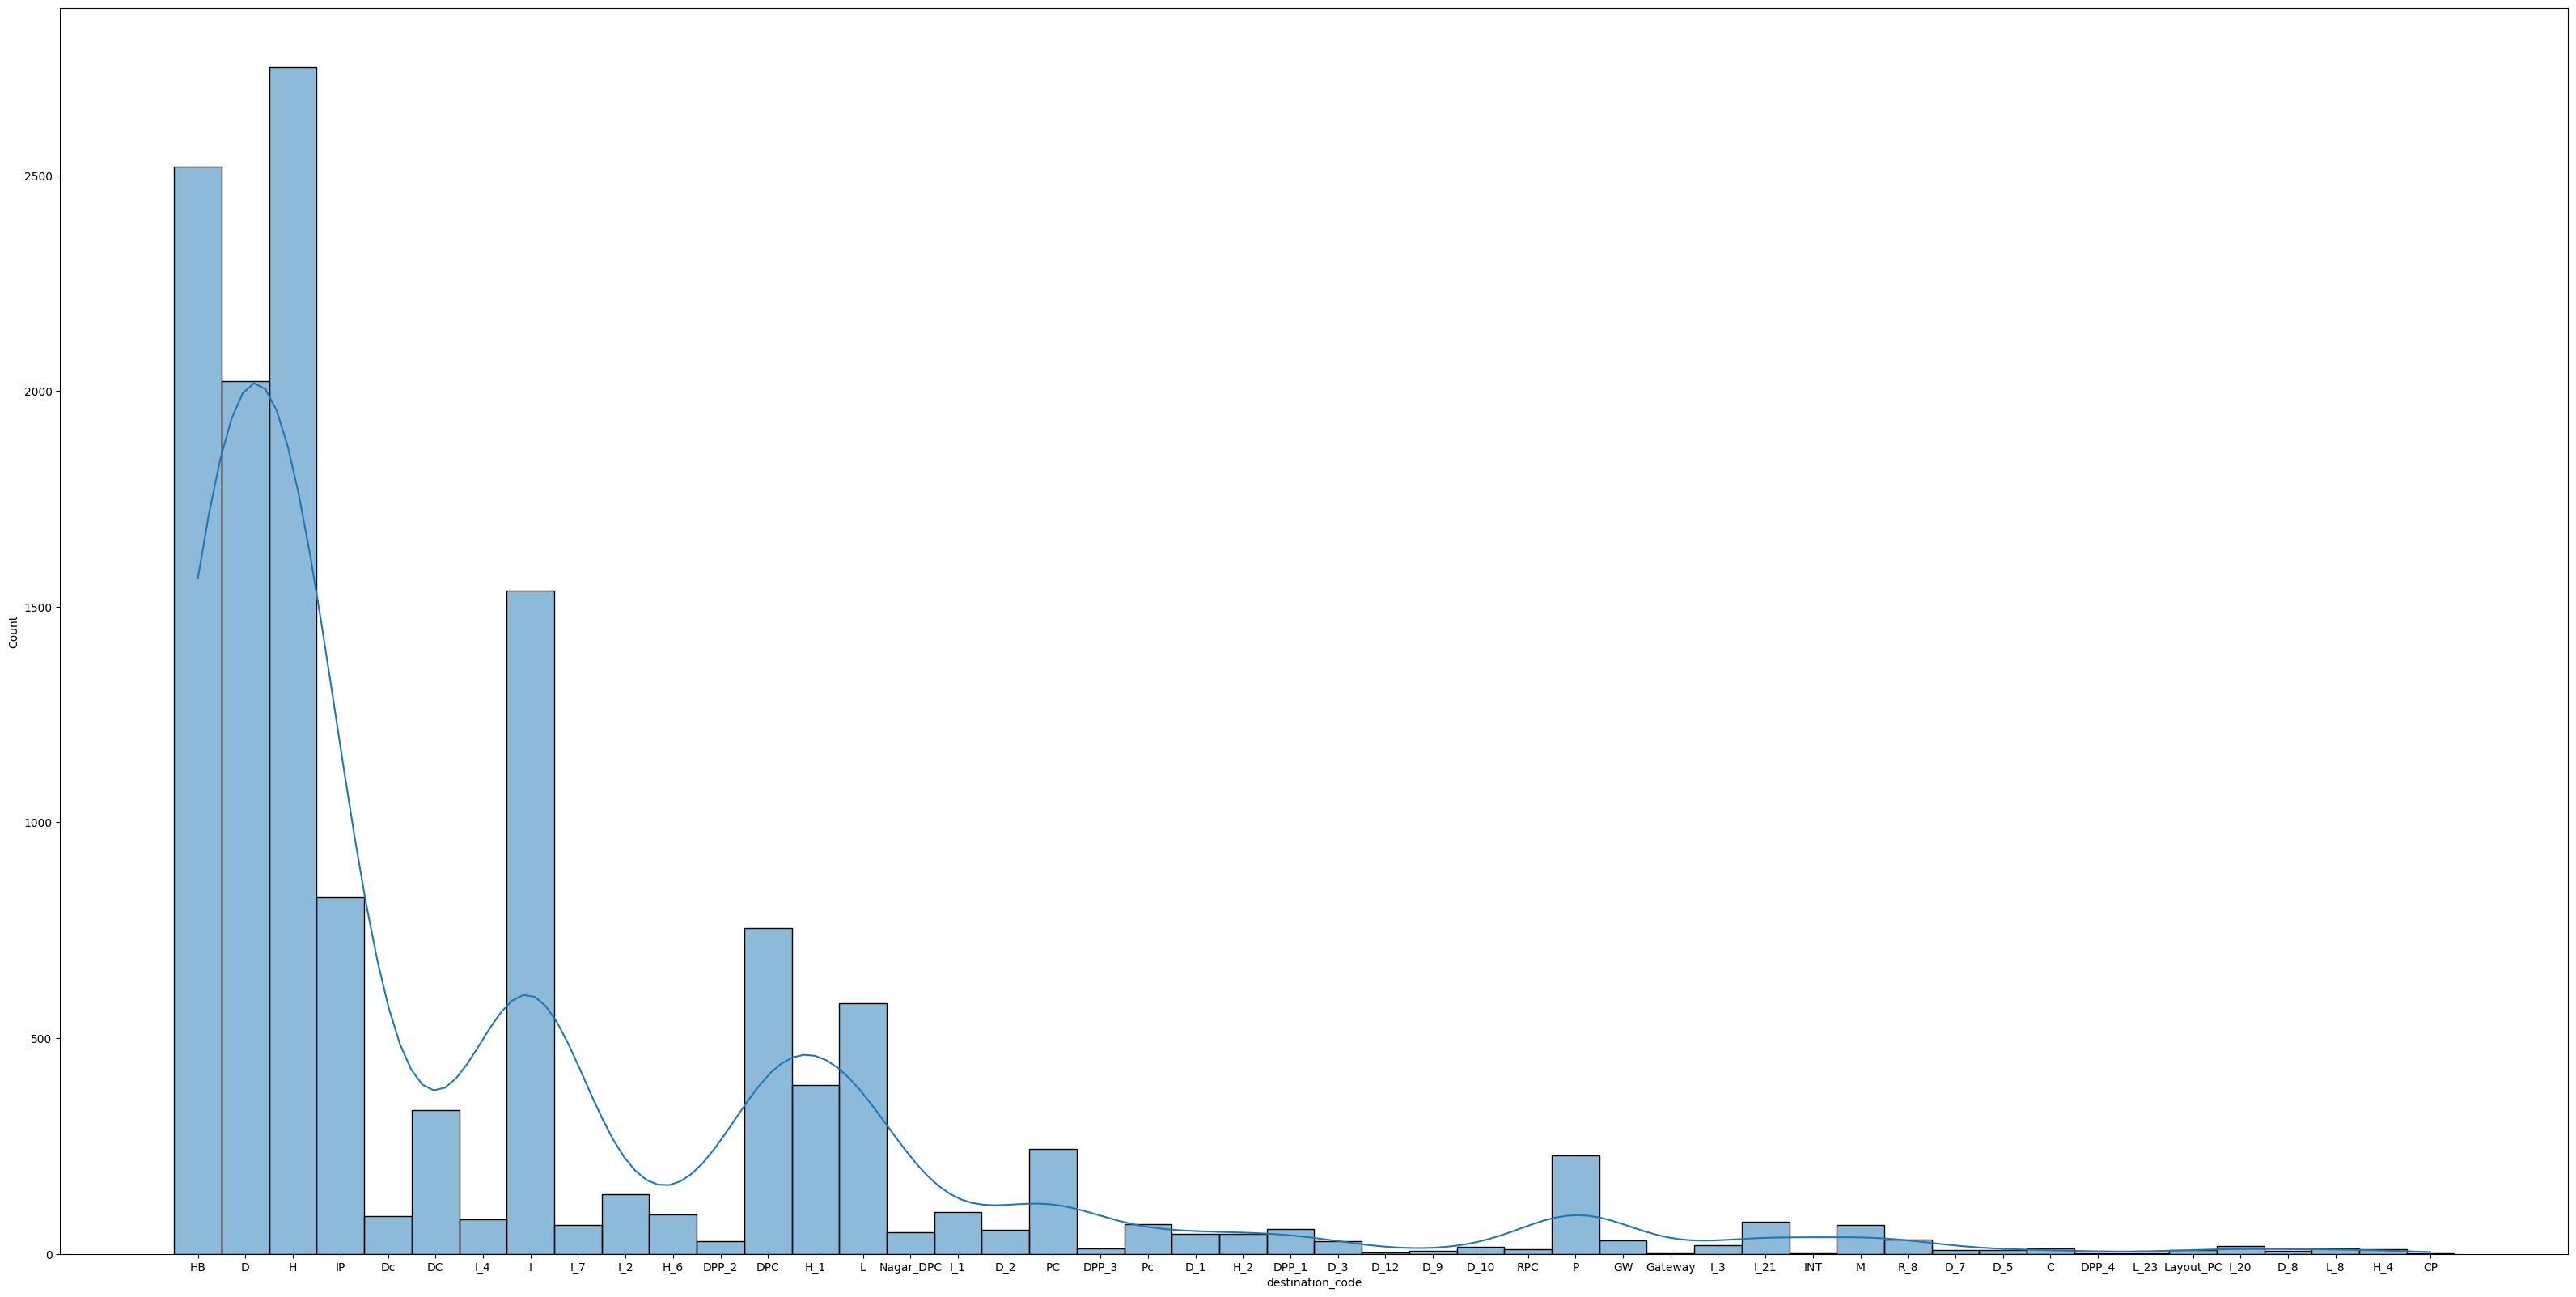

In [41]:
fig1, ax1 = plt.subplots(figsize=(40, 20))


sns.histplot(data =x_df , x ='destination_code', kde = True )

<Axes: xlabel='source_state', ylabel='Count'>

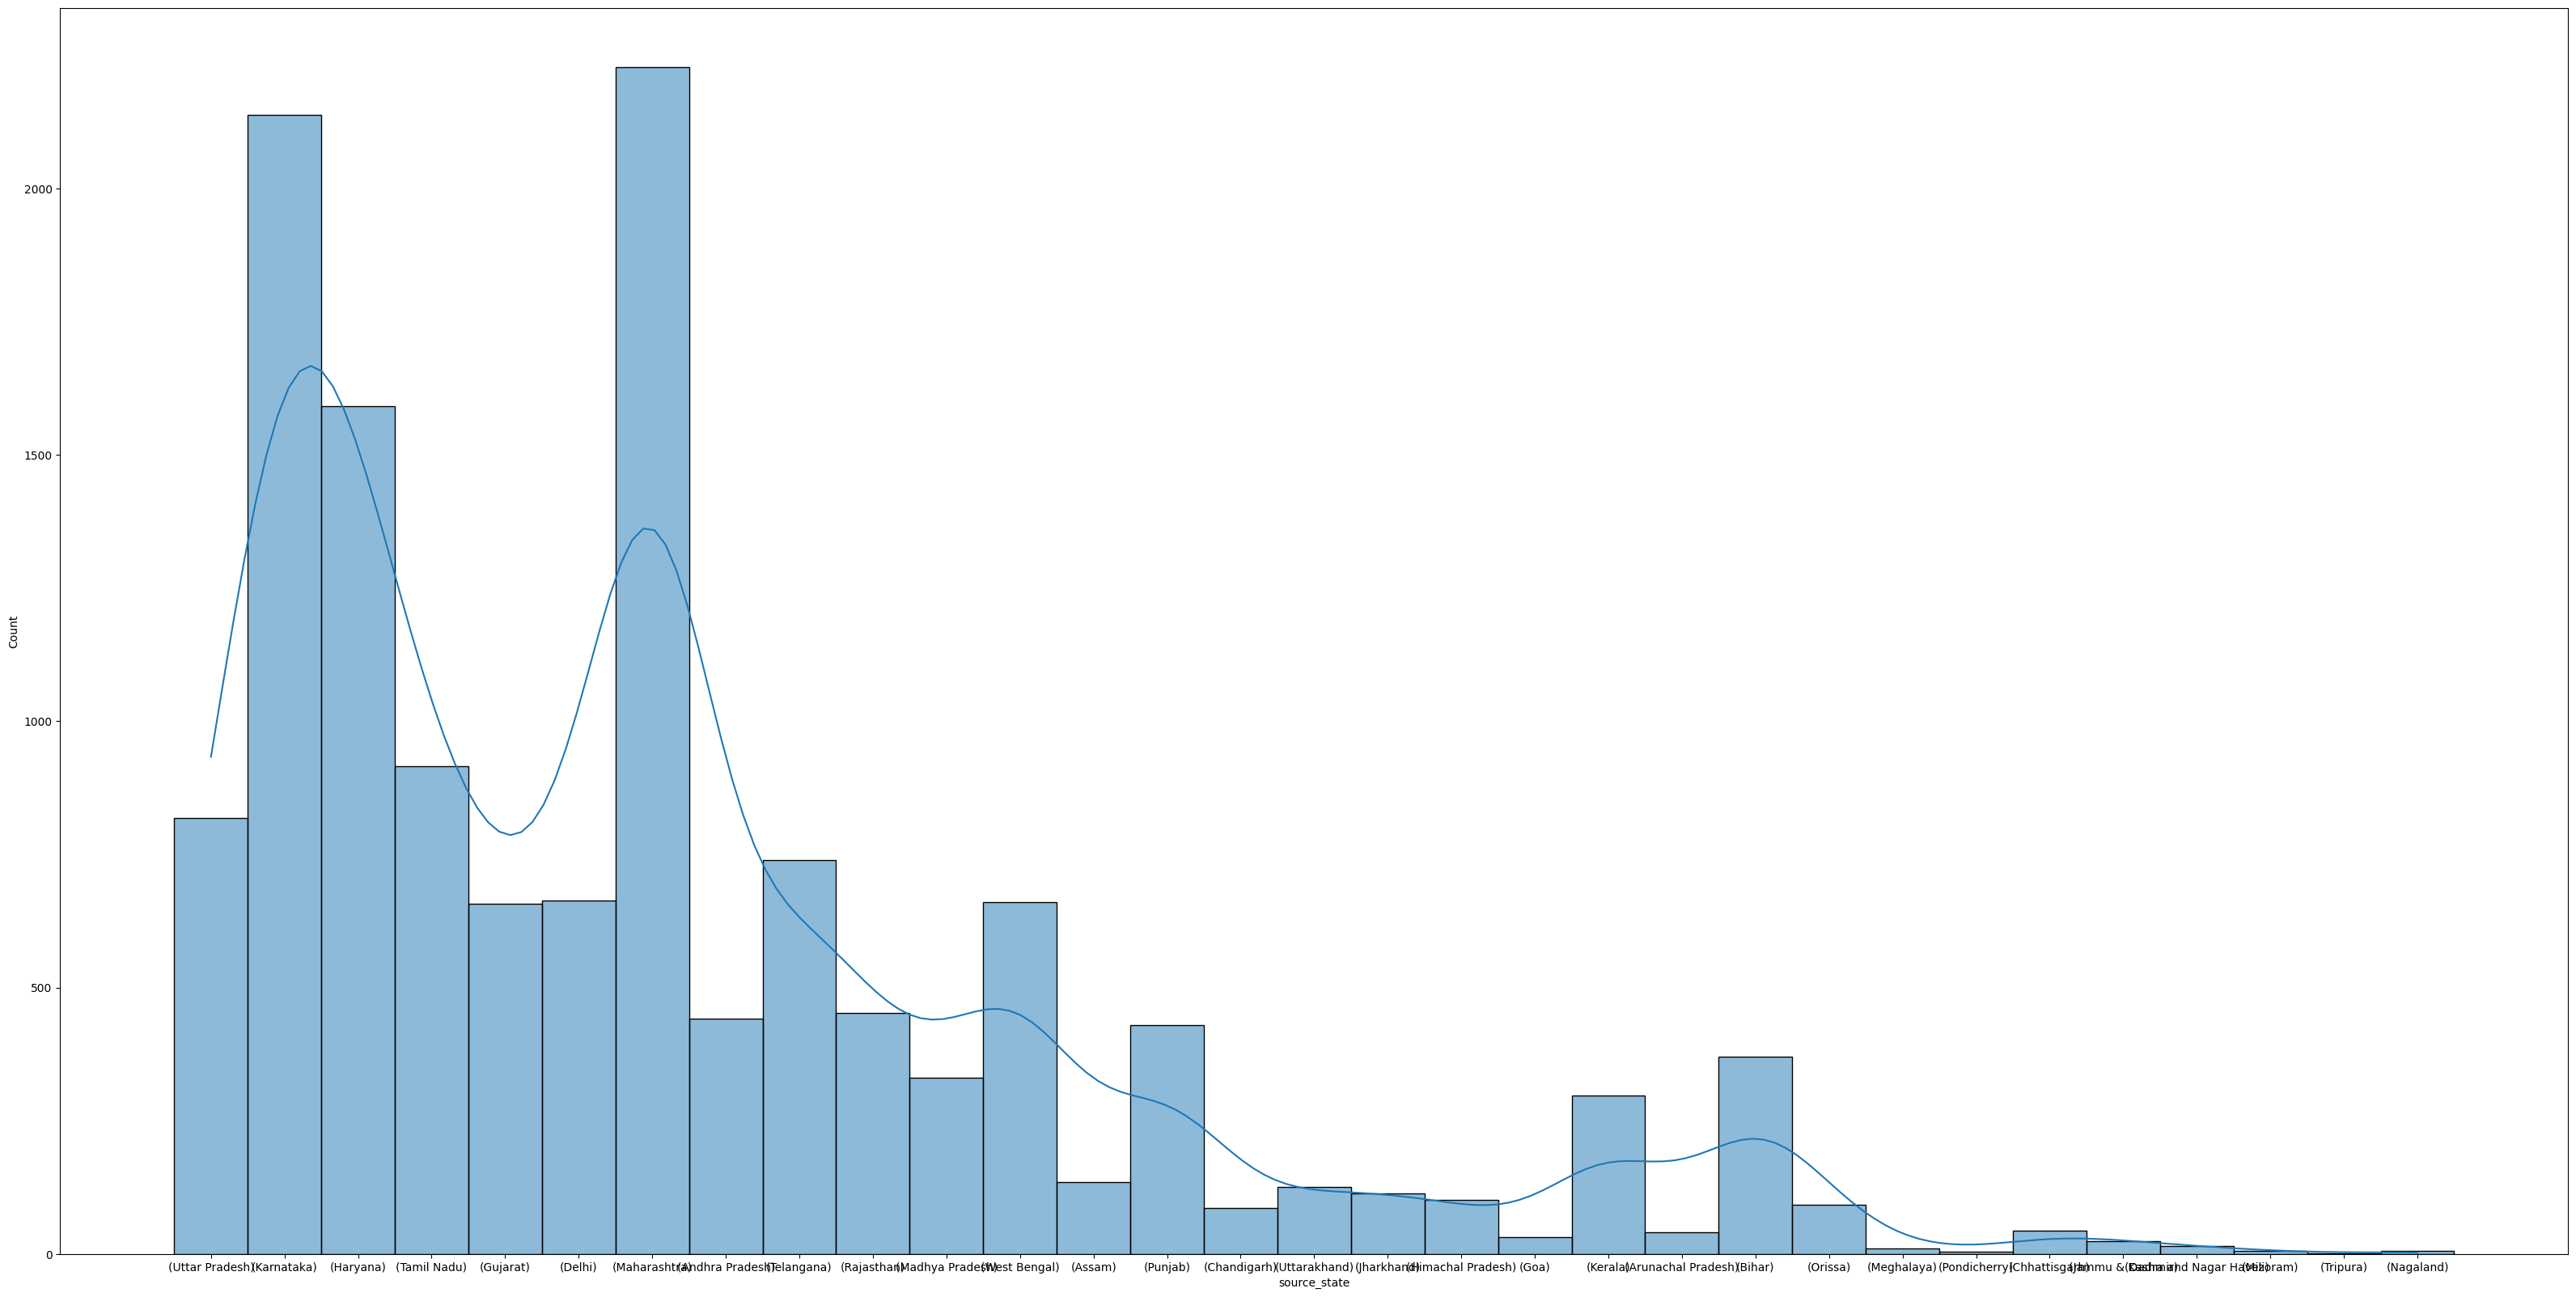

In [42]:
fig1, ax1 = plt.subplots(figsize=(40, 20))


sns.histplot(data =x_df , x ='source_state', kde = True )

<Axes: xlabel='destination_state', ylabel='Count'>

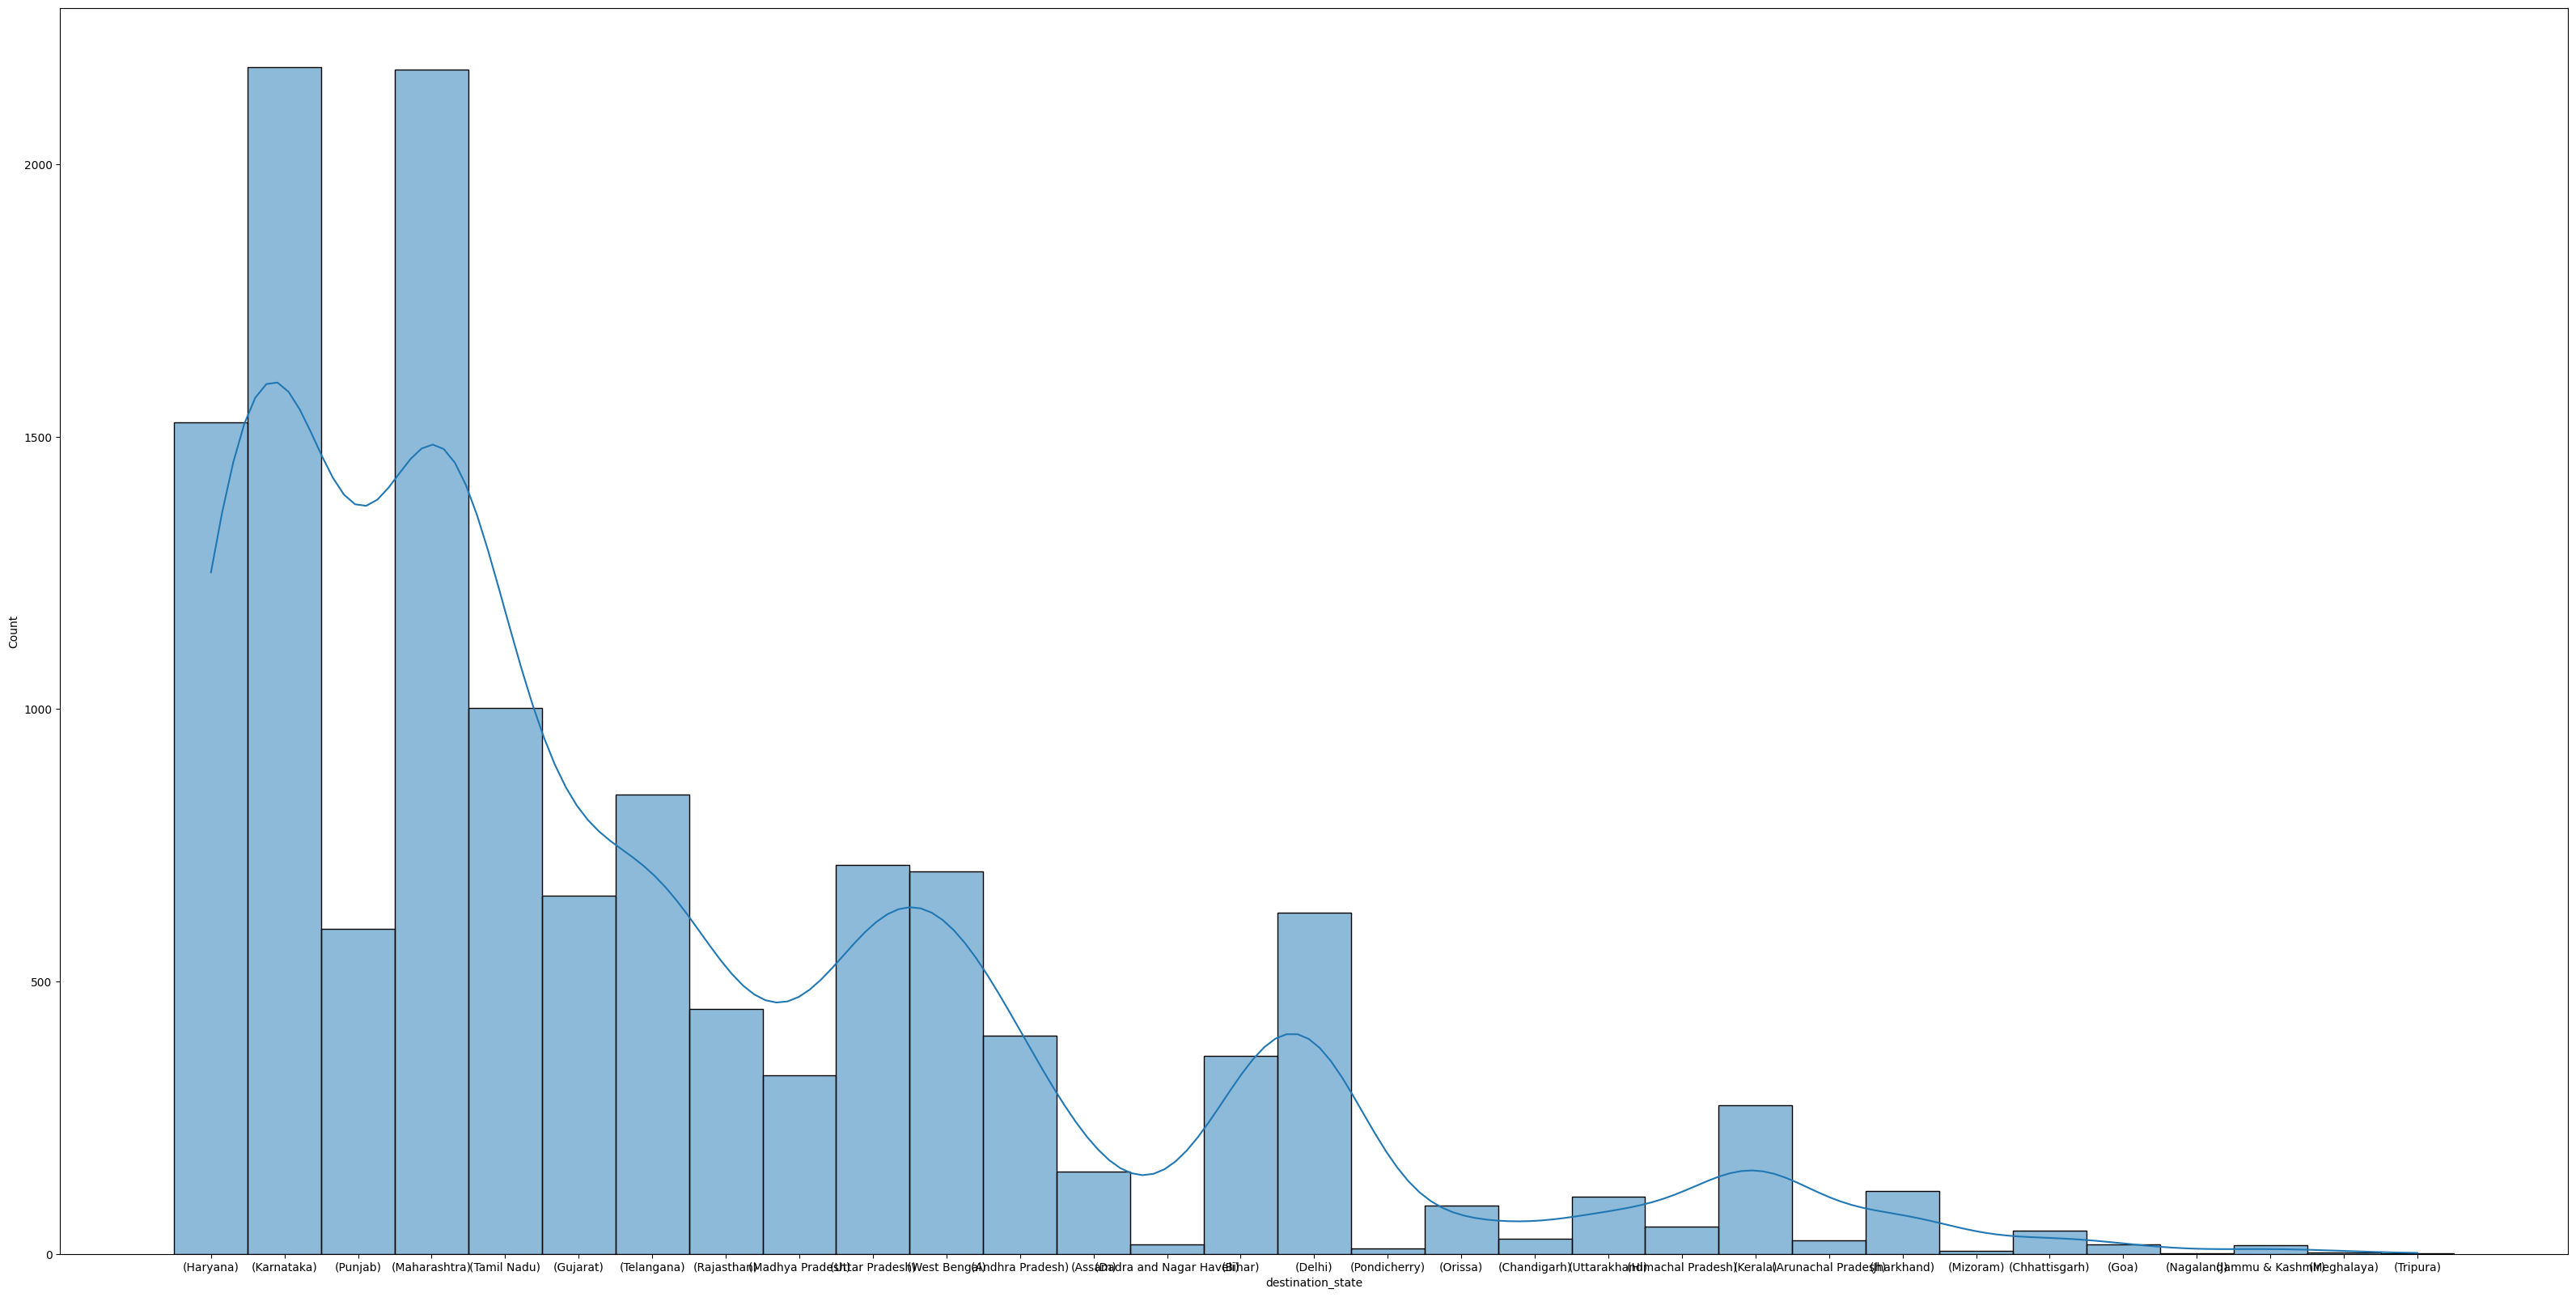

In [43]:
fig1, ax1 = plt.subplots(figsize=(40, 20))


sns.histplot(data =x_df , x ='destination_state', kde = True )

<Axes: xlabel='Trip_Day', ylabel='Count'>

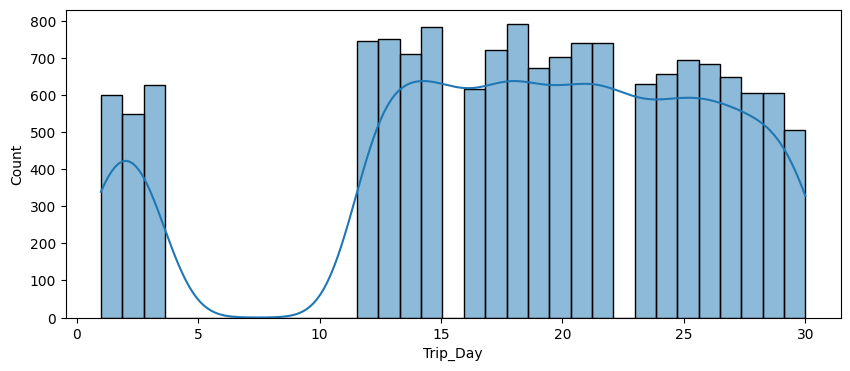

In [44]:
fig1, ax1 = plt.subplots(figsize=(10, 4))


sns.histplot(data =x_df , x ='Trip_Day', kde = True )

The most number of trips are from source code “D” & “HB” The most number of trips are to destination code “D” , “HB”,”H” & ”I” The most number of trips are from source state “Karnataka” , “Maharashtra”, “Haryana” The most number of trips are to Destination state “Karnataka” , “Maharashtra”, “Haryana” We can see that there is a slight decline in number of trips at the end of month

In [45]:
print("Number of states the pacakages are being received from : ",x_df.source_state.nunique())
print("Number of states the pacakages are being received from : ",x_df.destination_state.nunique())

Number of states the pacakages are being received from :  31
Number of states the pacakages are being received from :  31


<Axes: xlabel='count', ylabel='source_state'>

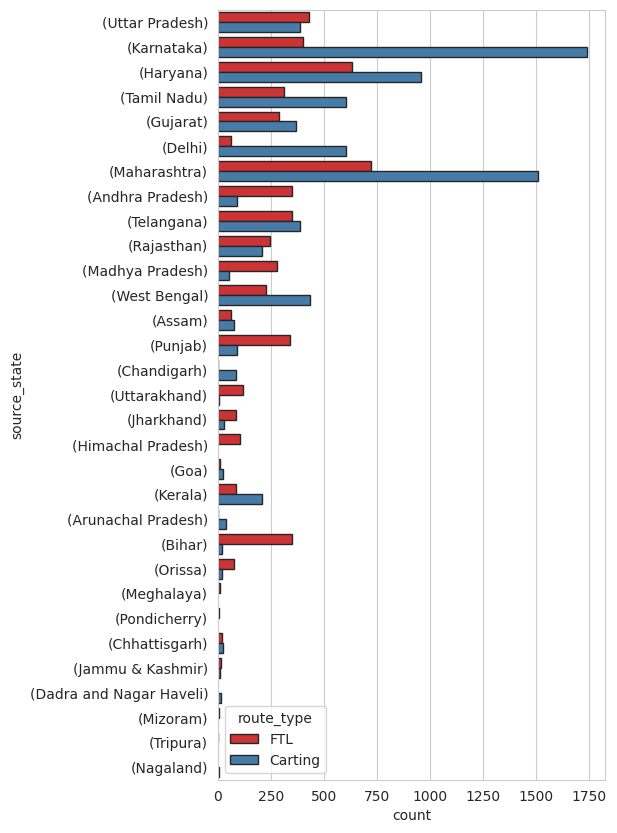

In [46]:
sns.set_style("whitegrid")

fig1, ax1 = plt.subplots(figsize=(5, 10))


sns.countplot(data =x_df , y ='source_state',  hue = "route_type",edgecolor="0.15", palette='Set1')

<Axes: xlabel='count', ylabel='destination_state'>

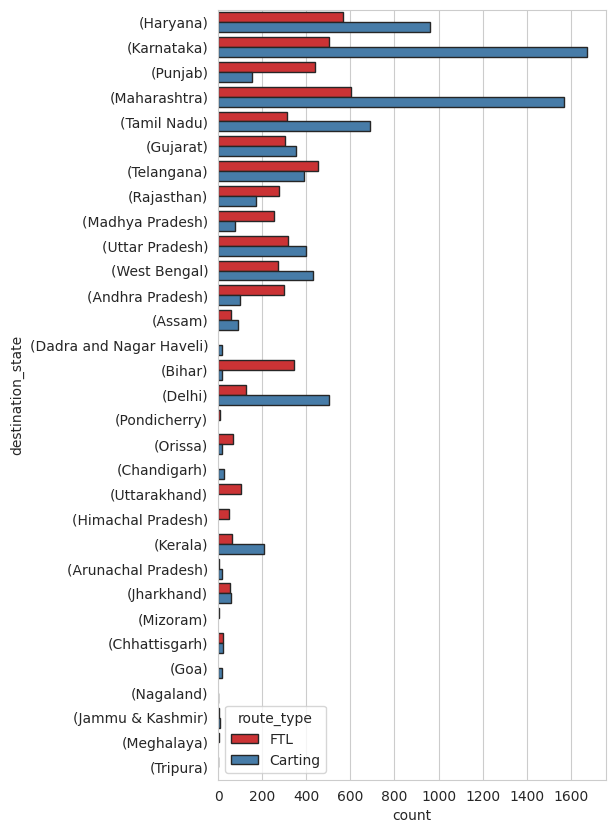

In [47]:
fig1, ax1 = plt.subplots(figsize=(5, 10))


sns.countplot(data =x_df , y ='destination_state',  hue = "route_type",edgecolor="0.15", palette='Set1')

<Axes: xlabel='count', ylabel='source_code'>

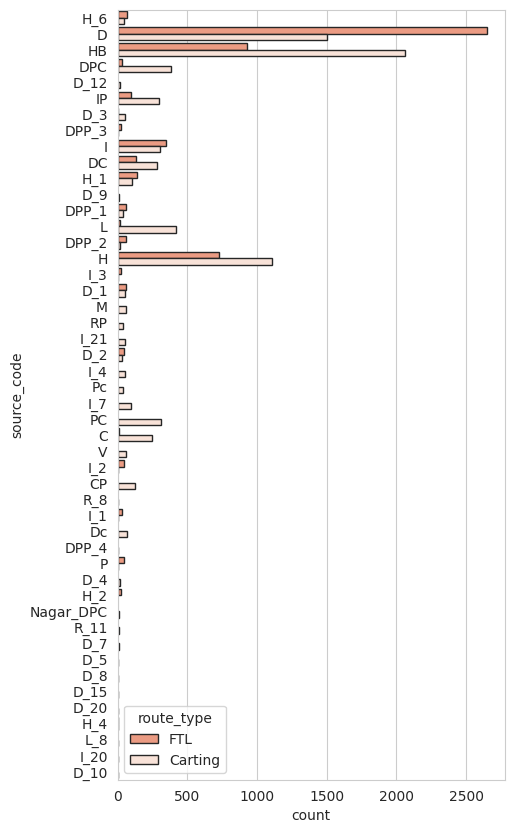

In [48]:
fig1, ax1 = plt.subplots(figsize=(5, 10))


sns.countplot(data =x_df , y ='source_code',  hue = "route_type",edgecolor="0.15", palette=["#fc9272","#fee0d2"])

<Axes: xlabel='count', ylabel='destination_code'>

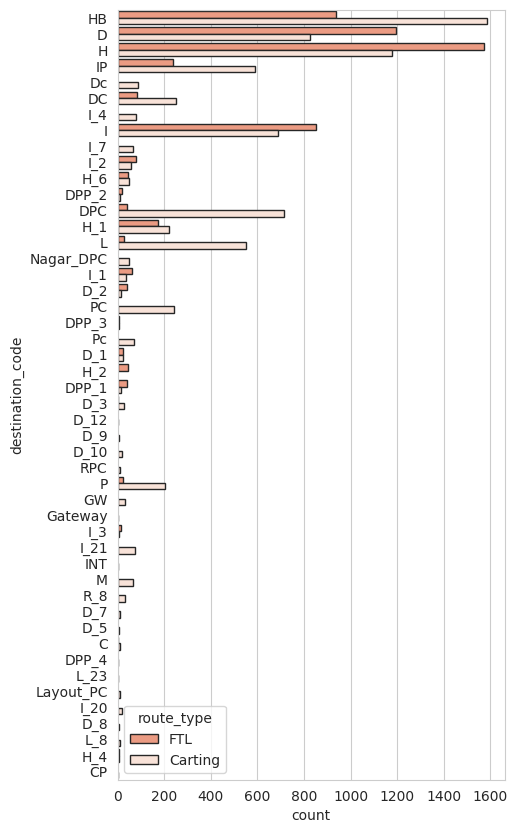

In [49]:
fig1, ax1 = plt.subplots(figsize=(5, 10))


sns.countplot(data =x_df , y ='destination_code',  hue = "route_type",edgecolor="0.15", palette=["#fc9272","#fee0d2"])

Although Karnataka has the highest number of trips from Source district still the majority of those trips come under non-dominant route-type i,e Carting , whereas Maharashtra has highest FTL type trips still which is dominated by Carting . Insights that are observed in trips from source district resemble the insights observed in trips to destination district Source codes D and HB are quiet opposite when it comes to dominance of FTL and carting, D has more number of FTL’s whereas HB has more number of Carting’s In Destination codes D , HB are same as source codes and H , I codes have FTL in dominance By comparing source code and destination code we can understand that these codes are again divided internally as sub-codes .

<Axes: xlabel='actual_time_y', ylabel='route_type'>

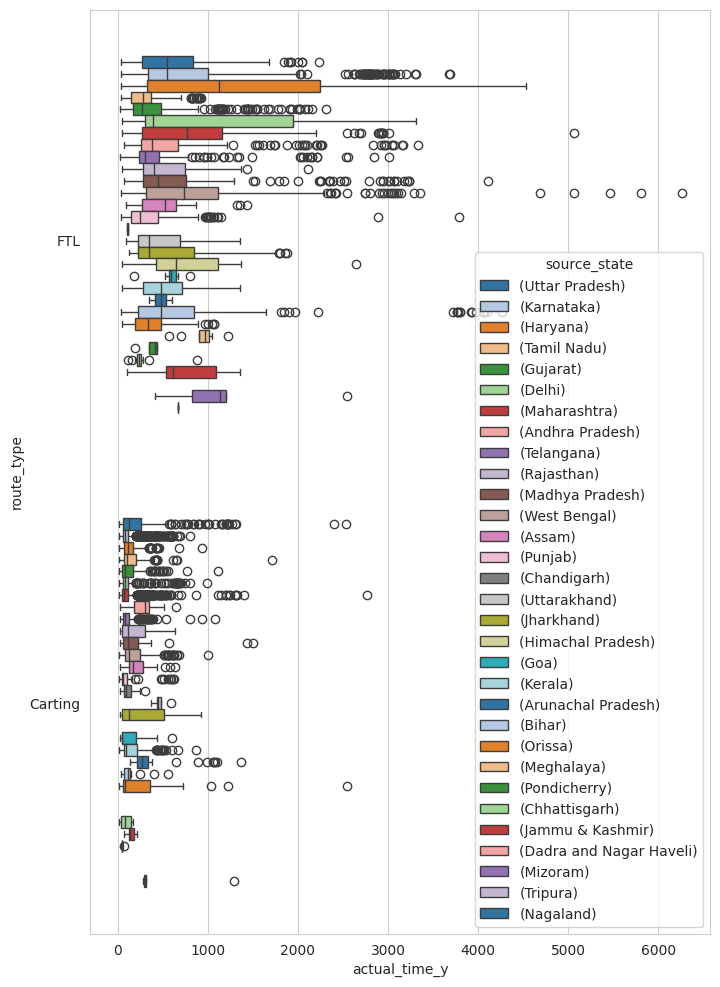

In [50]:
fig1, ax1 = plt.subplots(figsize=(8,12))
custom_palette = sns.color_palette("tab20", n_colors=30)

sns.boxplot(data=x_df, x='actual_time_y', y='route_type', hue='source_state', palette=custom_palette)

<Axes: xlabel='actual_time_y', ylabel='route_type'>

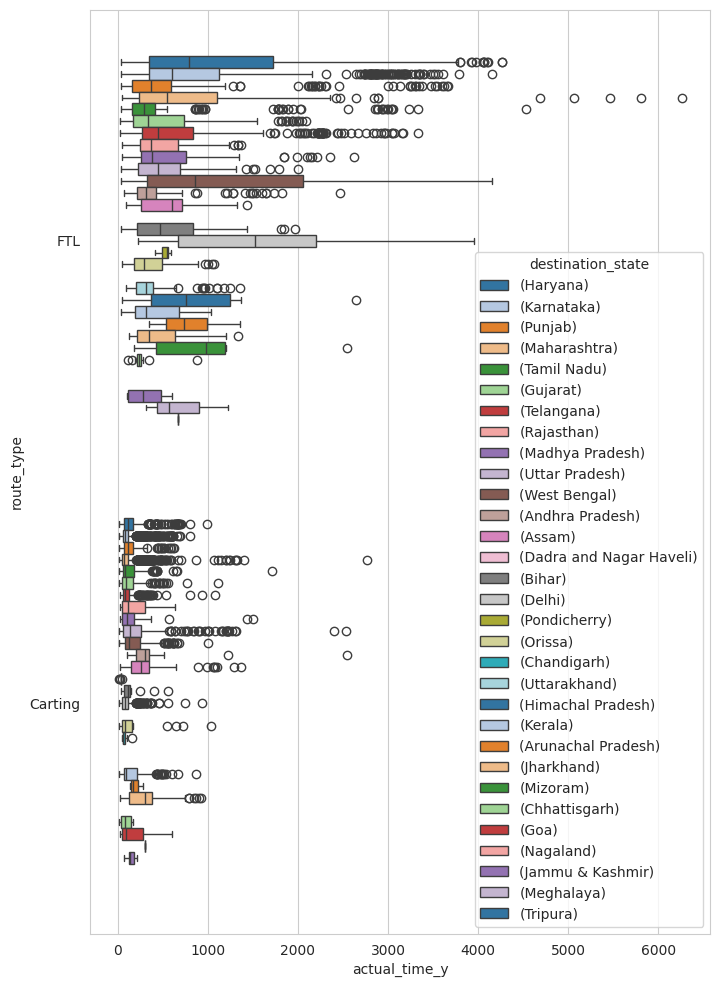

In [51]:
fig1, ax1 = plt.subplots(figsize=(8,12))
custom_palette = sns.color_palette("tab20", n_colors=30)

sns.boxplot(data=x_df, x='actual_time_y', y='route_type', hue='destination_state', palette=custom_palette)

<Axes: xlabel='actual_time_y', ylabel='route_type'>

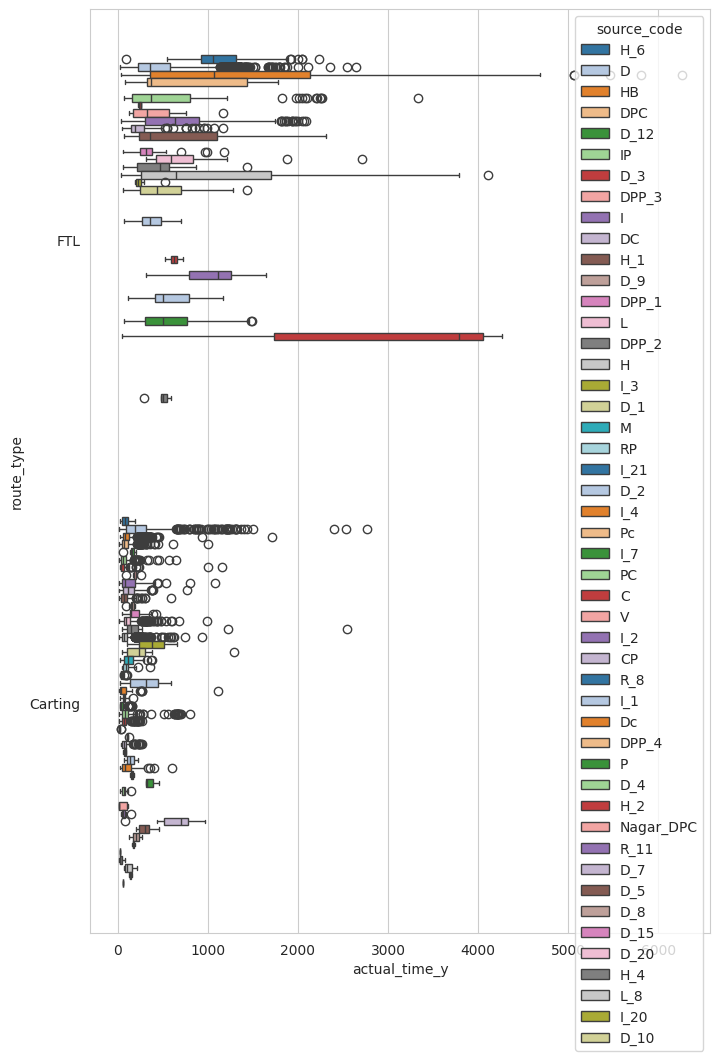

In [52]:
fig1, ax1 = plt.subplots(figsize=(8,12))
custom_palette = sns.color_palette("tab20", n_colors=30)

sns.boxplot(data=x_df, x='actual_time_y', y='route_type', hue='source_code', palette=custom_palette)

<Axes: xlabel='actual_time_y', ylabel='route_type'>

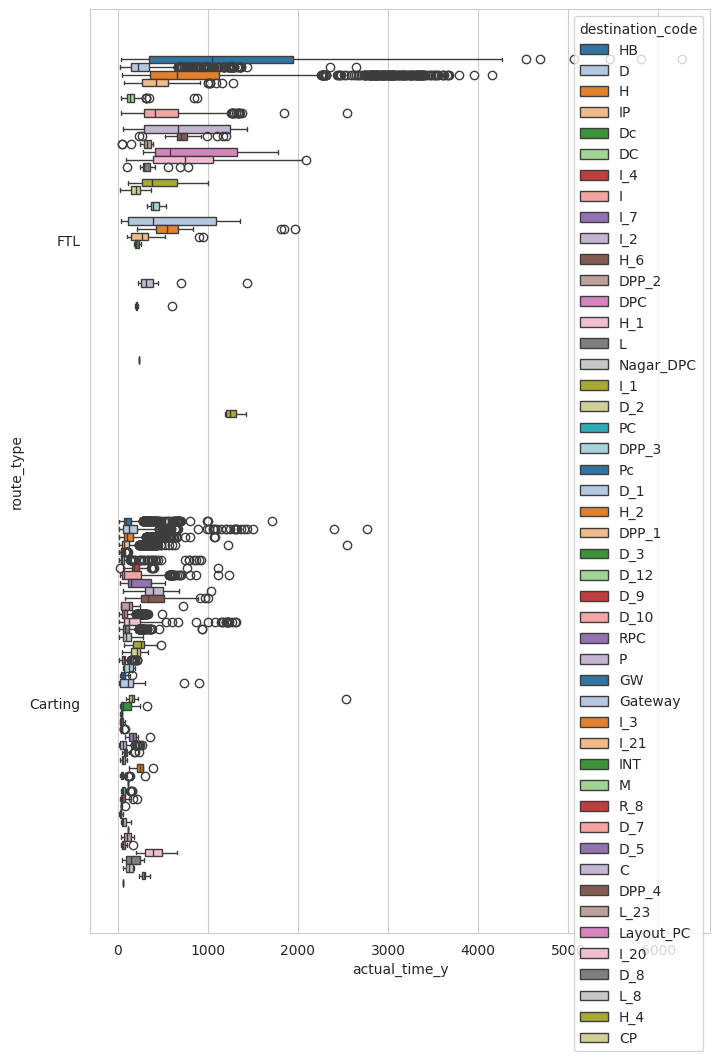

In [53]:
fig1, ax1 = plt.subplots(figsize=(8,12))
custom_palette = sns.color_palette("tab20", n_colors=30)

sns.boxplot(data=x_df, x='actual_time_y', y='route_type', hue='destination_code', palette=custom_palette)

Haryana doesn't have any outliers even though it has one of the highest number of trips from source district West Bengal took the highest number of minutes to complete the trip from source district by which we can also conclude West bengal also has the most number of far away destinations Carting type took very less time to complete the trip when compared to FTL even though FTL does not have any other pickups or drop-offs along the way . In Destination district West bengal doesn't have any outliers Maharashtra took the highest number of minutes to complete the trip to destination district by which we can also conclude Maharashtra receives from most number of far away source districts Carting type took very less time to complete the trip when compared to FTL even though FTL does not have any other pickups or drop-offs along the way . Source code HB has the highest number of minutes to complete the trip by which we can also conclude HB also has the most number of far away destinations Carting type took very less time to complete the trip when compared to FTL even though FTL does not have any other pickups or drop-offs along the way . Destination code HB has the highest number of minutes to complete the trip by which we can also conclude HB receives from most number of far away source districts Carting type took very less time to complete the trip when compared to FTL even though FTL does not have any other pickups or drop-offs along the way .

<Axes: xlabel='osrm_time_y', ylabel='osrm_distance_y'>

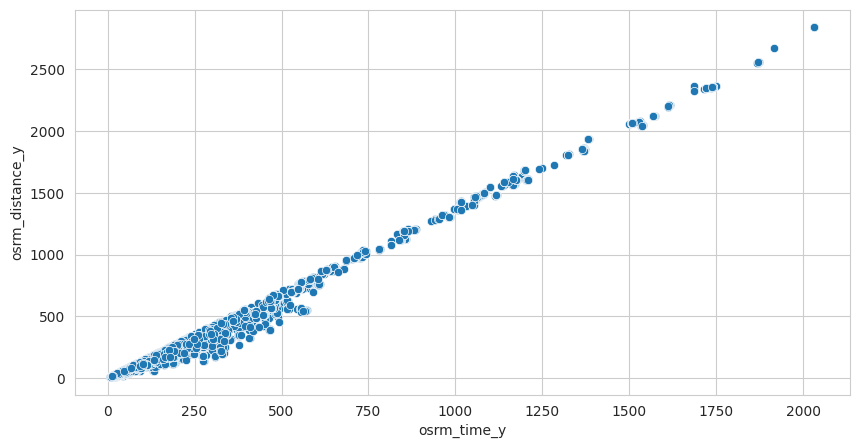

In [54]:
fig1, ax1 = plt.subplots(figsize=(10, 5))


sns.scatterplot(data =x_df , x ='osrm_time_y', y = 'osrm_distance_y' )

From the scatter plot of osrm_time, osrm_distance (Aggregate values ) we can see the trend is linear as the distance increases time increases



In [55]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

condensed_df.route_type = label_encoder.fit_transform(condensed_df.route_type)
condensed_df.route_type.value_counts()

,count
route_type,
1,99132
0,45184


<Axes: xlabel='Total_timetaken_y', ylabel='Density'>

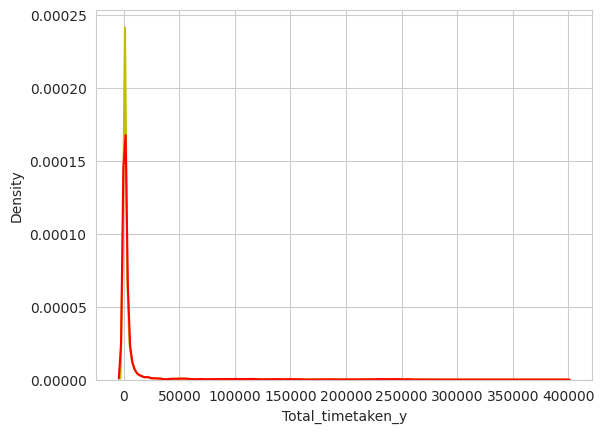

In [56]:
### Comparing Total_timetaken & start_scan_to_end_scan

x_df = condensed_df.groupby("trip_uuid")['Total_timetaken_y'].last()
x_df = pd.DataFrame(x_df)
x_df = x_df.reset_index()

y_df = condensed_df.groupby("trip_uuid")['start_scan_to_end_scan_y'].last()
y_df = pd.DataFrame(y_df)
y_df = y_df.reset_index()

sns.kdeplot(x_df.Total_timetaken_y,bw_adjust=0.2,color = "y")
sns.kdeplot(y_df.start_scan_to_end_scan_y,bw_adjust=0.3,color = "r")

<Axes: xlabel='Total_timetaken_y', ylabel='Density'>

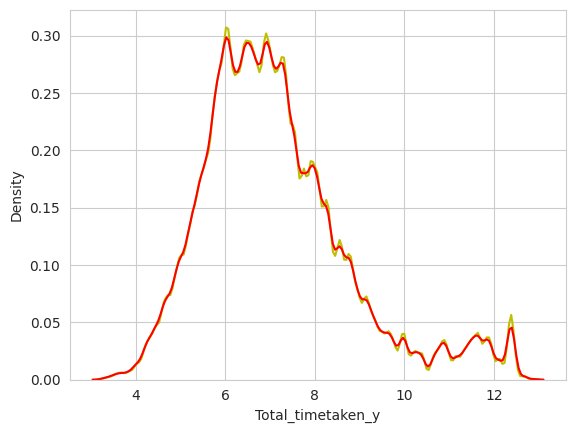

In [57]:
#Normalizing the data using Log transformation
x_df.Total_timetaken_y = np.log(x_df.Total_timetaken_y)

y_df.start_scan_to_end_scan_y = np.log(y_df.start_scan_to_end_scan_y)


sns.kdeplot(x_df.Total_timetaken_y,bw_adjust=0.2,color = "y")
sns.kdeplot(y_df.start_scan_to_end_scan_y,bw_adjust=0.3,color = "r")

INSIGHTS

The Given data has 144867 Rows and 24 Columns. The given data has two kinds of data that Training and test data No of rows in training data : 104858 , No of rows in test data : 40009 , We can see that majority of the data is training data Each Trip_uuid has more than one stops or relay points in its journey to reach from source to destination , hence group-by and Aggregate functions should be used careful i,e while grouping ["trip_uuid","source_name","destination_name"] use “last()” as we have multiple sources and destinations for each trip and while grouping ("trip_uuid") use sum() , also while using the grouping of segmented values we can directly use sum() as each value is individual recording . Columns Source-name and Destination-name have missing values with less than 0.2% , dropping off these rows as such minor percent of values may not affect the data.

After dividing Source-name and Destination-name into city, place , code , state , it is seen that the address format is not the same for all orders and missing values can be found in place -1.5% , code-10% , state-10% , filling the null values with value of column city of the same respective rows Column trip_creation_time can be divided into Trip_Year, Trip_Month, Trip_Day , from these we can infer that data is from year 2018, month september(9) but data from days 4 to 11 are not present in data . Column start_scan_to_end_scan contains time taken to deliver from source to destination in Mins Using columns 'od_end_time','od_start_time' a new feature can be created Total time taken but checking the difference between 'od_end_time','od_start_time' . Before grouping the data by trip_uuid Route type FTL comprises 67.95% and Carting comprises 32.05% of the total orders . Top cities that have more number of Trips are Bangalore, Gurgaon, Kolkata, Hyderabad, Bhiwandi, Delhi. FTL deliveries are mostly Inter-state and Carting are mostly Intra-state services. After grouping the data by trip_uuid Route type FTL comprises 57.84% and Carting comprises 42.16% of the total orders .

From the above difference between before and after grouping by trip_uuid we can infer that FTL type has more relay point although it is not making no other pickups or drop-offs along the way Among the given data Training data comprises 72.49% and test data comprises 27.51% Grouping data on trip_uuid to perform Visual Analysis Univariate Analysis : The most number of trips are from source code “D” & “HB” The most number of trips are to destination code “D” , “HB”,”H” & ”I” The most number of trips are from source state “Karnataka” , “Maharashtra”, “Haryana” The most number of trips are to Destination state “Karnataka” , “Maharashtra”, “Haryana” We can see that there is a slight decline in number of trips at the end of month Bivariate Analysis : Although Karnataka has the highest number of trips from Source district still the majority of those trips come under non-dominant route-type i,e Carting , whereas Maharashtra has highest FTL type trips still which is dominated by Carting .

Insights that are observed in trips from source district resemble the insights observed in trips to destination district Source codes D and HB are quiet opposite when it comes to dominance of FTL and carting, D has more number of FTL’s whereas HB has more number of Carting’s In Destination codes D , HB are same as source codes and H , I codes have FTL in dominance By comparing source code and destination code we can understand that these codes are again divided internally as sub-codes .

Multivariate Analysis : Haryana doesn't have any outliers even though it has one of the highest number of trips from source district West Bengal took the highest number of minutes to complete the trip from source district by which we can also conclude West bengal also has the most number of far away destinations Carting type took very less time to complete the trip when compared to FTL even though FTL does not have any other pickups or drop-offs along the way .

In Destination district West bengal doesn't have any outliers Maharashtra took the highest number of minutes to complete the trip to destination district by which we can also conclude Maharashtra receives from most number of far away source districts Carting type took very less time to complete the trip when compared to FTL even though FTL does not have any other pickups or drop-offs along the way .

Source code HB has the highest number of minutes to complete the trip by which we can also conclude HB also has the most number of far away destinations Carting type took very less time to complete the trip when compared to FTL even though FTL does not have any other pickups or drop-offs along the way .

Destination code HB has the highest number of minutes to complete the trip by which we can also conclude HB receives from most number of far away source districts Carting type took very less time to complete the trip when compared to FTL even though FTL does not have any other pickups or drop-offs along the way .

From the scatter plot of osrm_time, osrm_distance (Aggregate values ) we can see the trend is linear as the distance increases time increases Outliers are found in Columns actual_time_y, segment_actual_time_y, segment_osrm_distance_y, segment_osrm_time_y, start_scan_to_end_scan_y, Total_timetaken_y. NOTE : the letter “_y” after each Column name represents its Aggregated data .

Visual analysis of Total_timetaken & start_scan_to_end_scan shows that both the data are similar & Hypothesis test Result - H0 Null hypothesis rejected , there is significant difference between the two groups Visual analysis of actual_time_y & osrm_time_y shows that both the data are similar & Hypothesis test Result - H1 failed to reject Null hypothesis , actual_time = osrm_time

Visual analysis of actual_time_y & segment_actual_time_y shows that both the data are similar & Hypothesis test Result - H0 Null hypothesis rejected , there is significant difference between the two groups.

Visual analysis of osrm_distance_y & segment_osrm_distance_y shows that both the data are similar & Hypothesis test Result - H1 failed to reject Null hypothesis , osrm_distance = segment_osrm_distance Visual analysis of osrm_time_y & segment_osrm_time_y shows that both the data are similar & Hypothesis test Result - H0 Null hypothesis rejected , there is significant difference between the two groups



**Recommendations**

States and cities that have Higher traffic of Orders like Maharashtra, Karnataka ,Haryana also Bangalore , Hyderabad etc need to check and increase warehouse capacity and workers.

States and cities that have Lower traffic of Orders like Jummu & Kashmir, Uttarakhand etc , the company has to increase their exposure for their services by using difference means of advertising . Delhivary mostly provides services in Bulk and B to B , so creating weight margin discounts can increase sales dramatically.

Reviewing the used OSRM can be beneficial as it failed to match the actual observations in some cases like osrm_time & segment_osrm_time .